In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Hierarchical Clustering



# East-West Airlines Data

In [2]:
df=pd.read_excel("EASTWEST-Airlines.xlsx",)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [45]:
# from discription we drop the telecom & CHAR columns

In [3]:
EW=df.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?'],axis=1)
EW

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,28143,0,174,1,0,0
1,19244,0,215,2,0,0
2,41354,0,4123,4,0,0
3,14776,0,500,1,0,0
4,97752,0,43300,26,2077,4
...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1
3995,64385,0,981,5,0,0
3996,73597,0,25447,8,0,0
3997,54899,0,500,1,500,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# Data Transformation 

sc = StandardScaler()

x = sc.fit_transform(EW)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01,
        -1.10406452e+00, -3.28603258e-01, -3.62167870e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01,
        -9.99926165e-01, -3.28603258e-01, -3.62167870e-01],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01,
        -7.91649446e-01, -3.28603258e-01, -3.62167870e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01,
        -3.75096007e-01, -3.28603258e-01, -3.62167870e-01],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01,
        -1.10406452e+00,  2.85309024e-02, -9.85033311e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01,
        -1.20820288e+00, -3.28603258e-01, -3.62167870e-01]])

# Dendrogram with complete linkage

In [6]:
from scipy.cluster import hierarchy

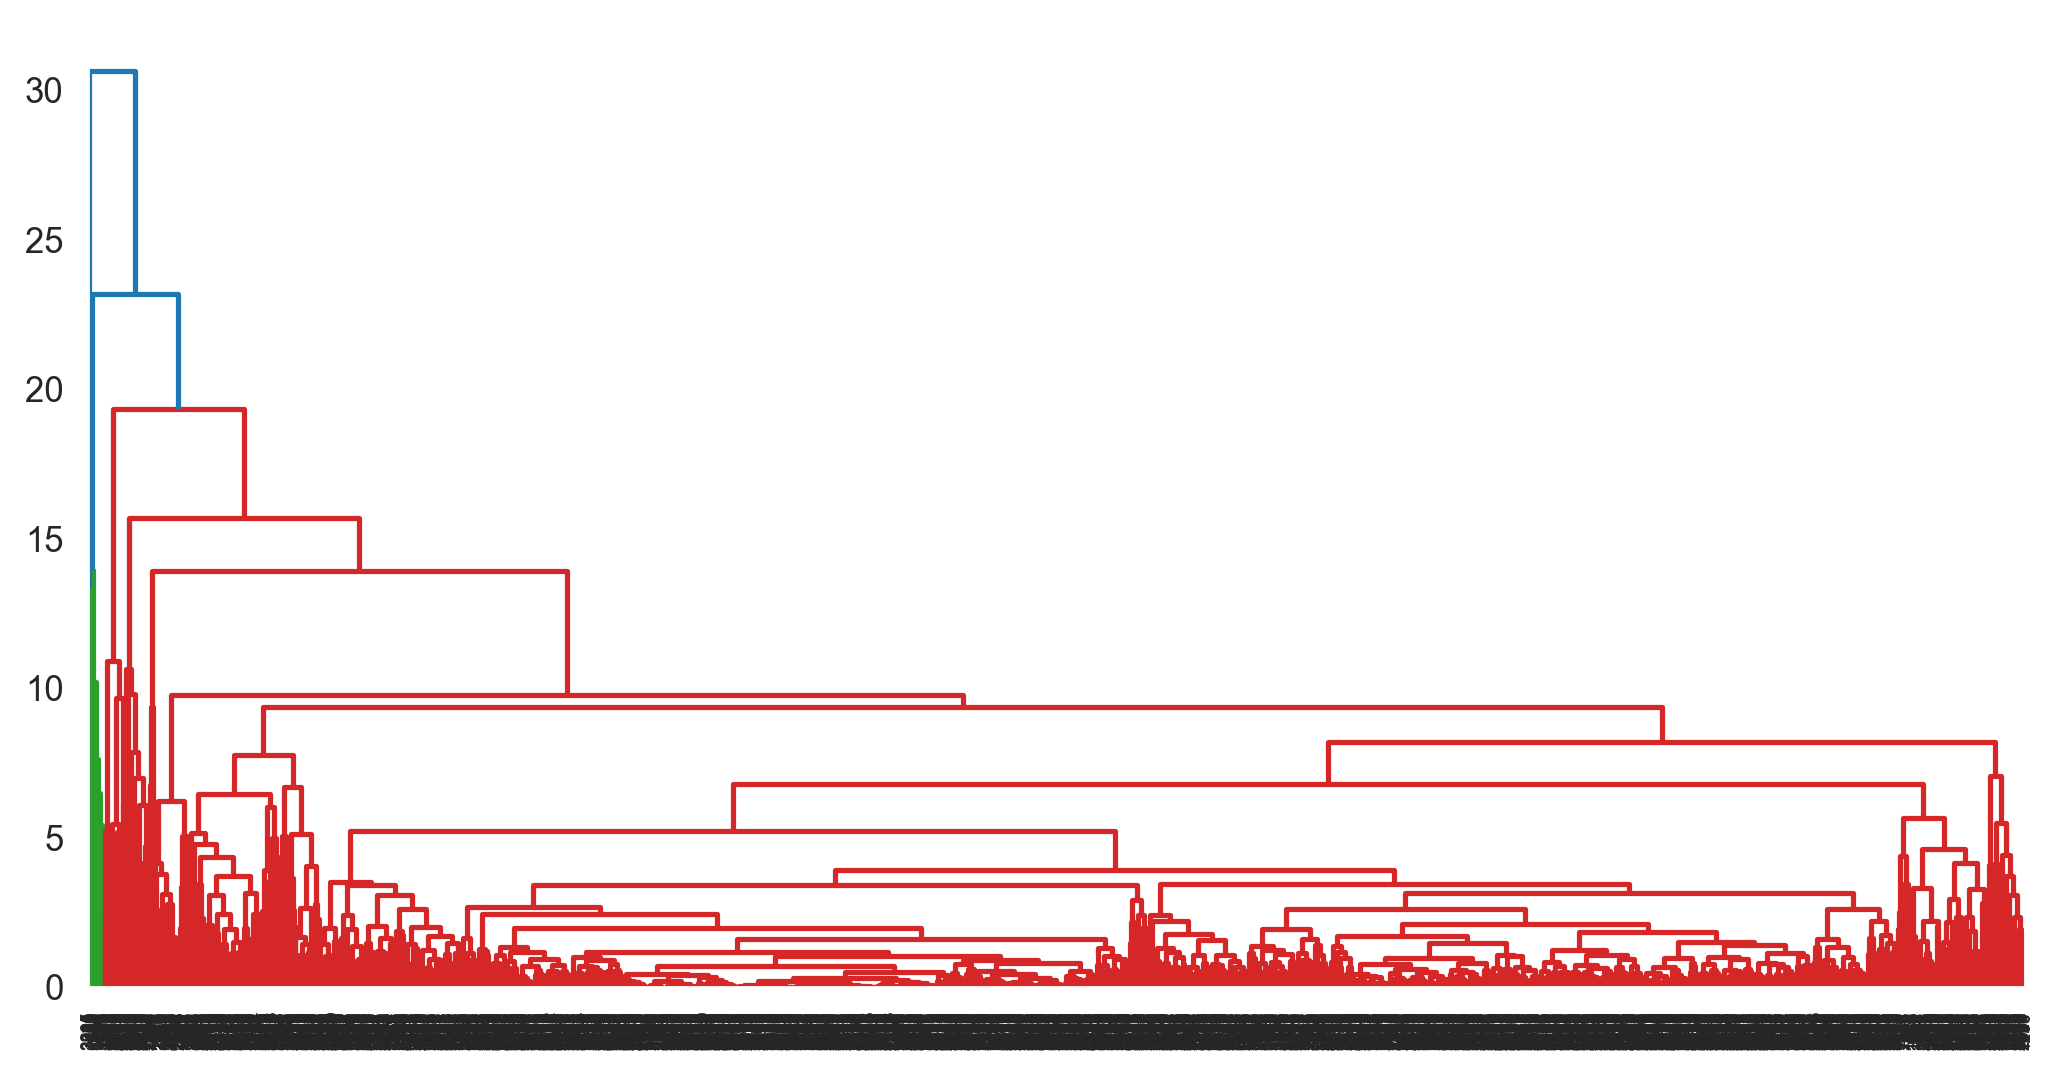

In [7]:
# Complete Method

lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
hc = AgglomerativeClustering(n_clusters=3)

ypred = hc.fit_predict(x)

In [10]:
EW['cluster'] = ypred
EW

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
0,28143,0,174,1,0,0,1
1,19244,0,215,2,0,0,1
2,41354,0,4123,4,0,0,1
3,14776,0,500,1,0,0,1
4,97752,0,43300,26,2077,4,0
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1
3995,64385,0,981,5,0,0,1
3996,73597,0,25447,8,0,0,1
3997,54899,0,500,1,500,1,1


In [11]:
EW.groupby('cluster').agg('mean')


,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
cluster,,,,,,
0,137006.030382,292.331597,41584.879340,18.741319,846.741319,2.546007
1,45732.183124,76.048474,6603.417594,8.152244,123.830521,0.417235
2,147365.032258,447.629032,36547.435484,33.903226,8378.209677,22.548387


In [12]:
EW['cluster'].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Crime Data

In [13]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [15]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [16]:
CR=crime.drop(['Unnamed: 0'], axis=1)
CR

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [17]:
sc = StandardScaler()

CRx = sc.fit_transform(CR)
CRx

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Dendrogram

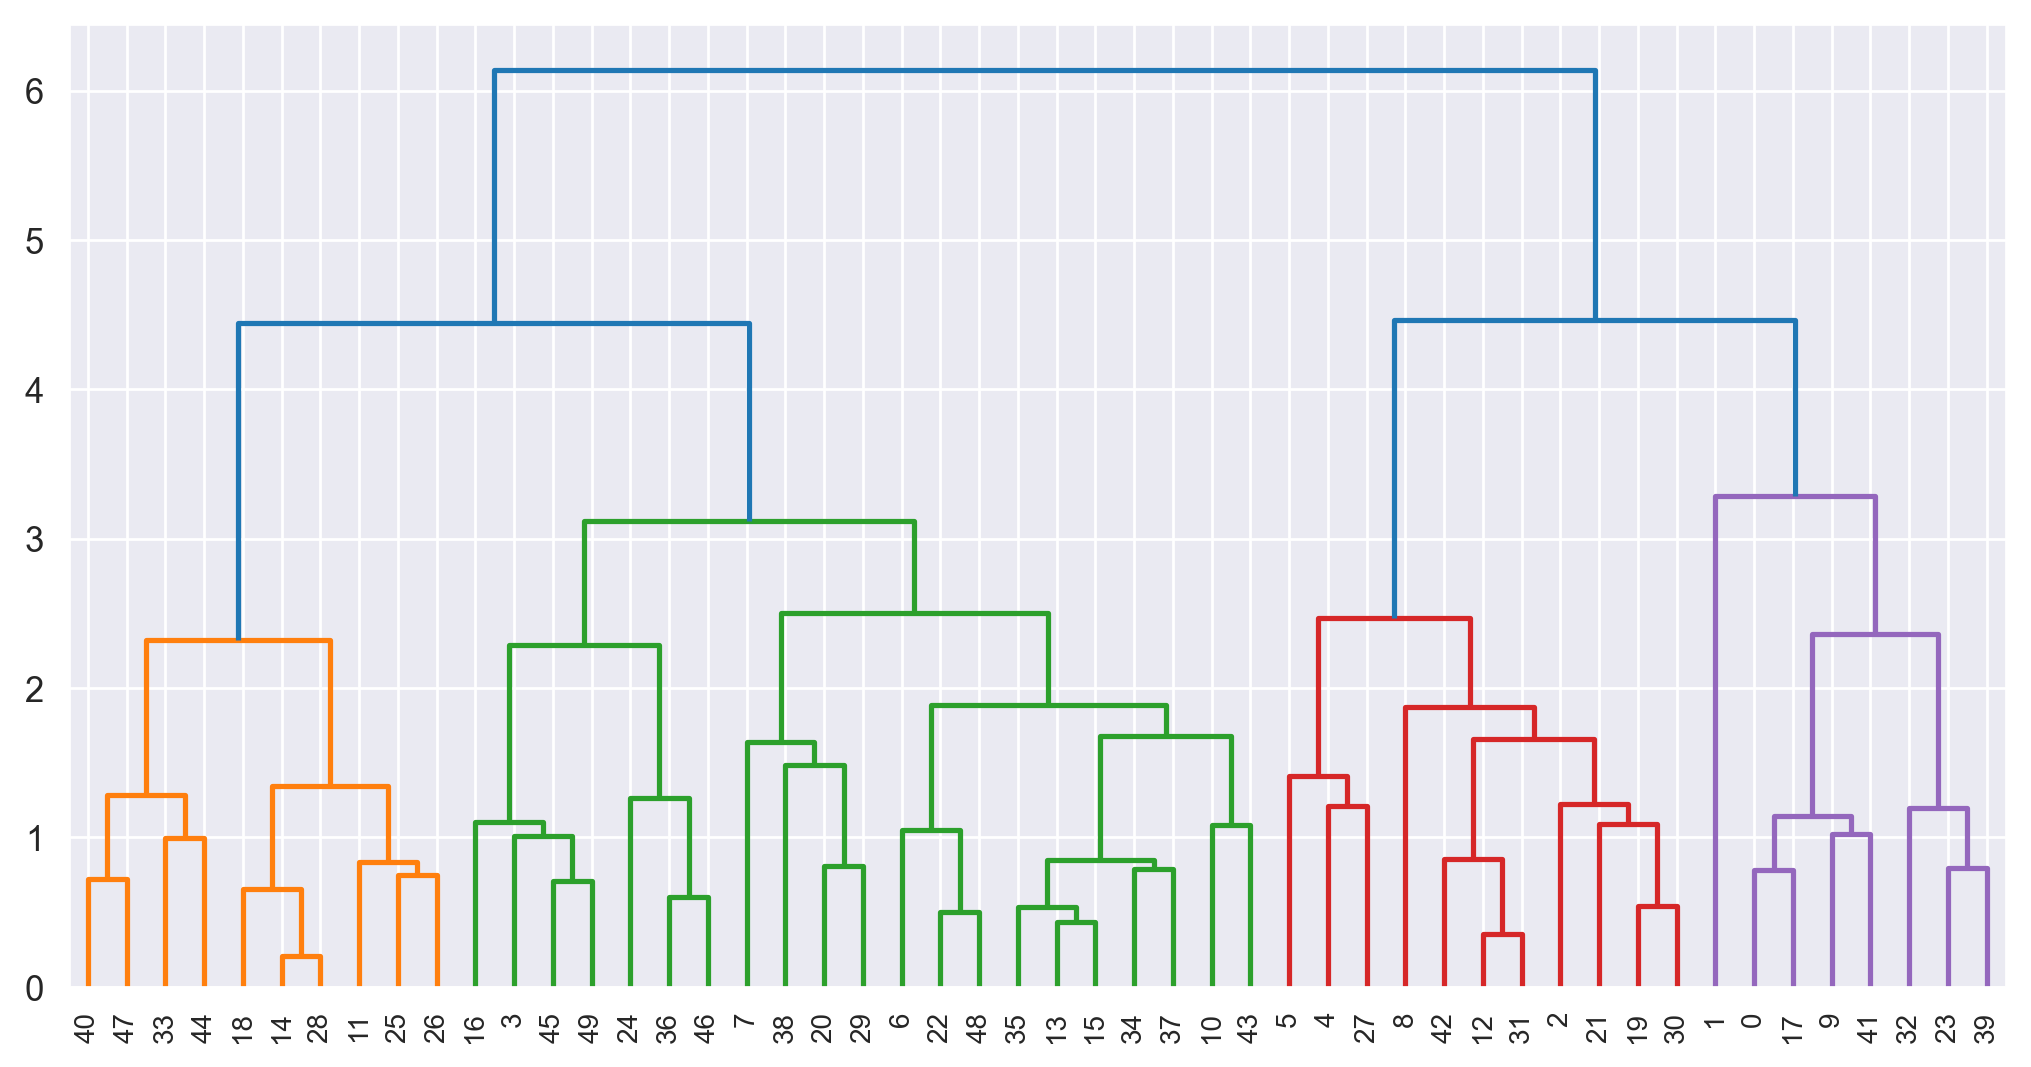

In [18]:
CRlk = hierarchy.linkage(CRx, method='complete')
dendrogram = hierarchy.dendrogram(CRlk)

In [19]:
CRhc = AgglomerativeClustering(n_clusters=4)

ypred = CRhc.fit_predict(CRx)

In [20]:
ypred

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [21]:
CR['cluster'] = ypred
CR

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [22]:
CR.groupby('cluster').agg('mean')


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [23]:
crime['cluster'] = ypred
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [24]:
crime.groupby('cluster').agg('mean')


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


# KMeans Clustering

# EastWest Airlines Data

In [25]:
df=pd.read_excel("EASTWEST-Airlines.xlsx",)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
EW=df.drop(['ID#'],axis=1)
EW

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
sc = StandardScaler()

EWx = sc.fit_transform(EW)
EWx

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [28]:
from sklearn.cluster import KMeans


In [29]:
km = KMeans()
yp = km.fit_predict(EWx)
yp

array([0, 0, 0, ..., 5, 7, 7])

In [34]:
#cluster centre
km.cluster_centers_

array([[ 4.32162891e-01,  7.28789290e+00, -5.71968845e-02,
        -9.82418871e-02, -6.27665798e-02,  5.05067576e-02,
         7.14973429e-02,  3.41943600e-01,  3.93332443e-01,
        -7.62393239e-02,  2.68499430e-01],
       [-1.86431698e-01, -1.45604484e-01, -1.07752078e-01,
        -9.82418871e-02, -6.27665798e-02, -2.37921805e-01,
         5.50255255e-01, -2.55002803e-01, -2.84540747e-01,
        -8.06722769e-01, -7.61663366e-01],
       [ 2.41094114e-01, -1.60551814e-01,  5.81014487e-01,
        -9.82418871e-02, -6.27665798e-02,  6.70105206e-02,
         4.47031426e-01, -2.34041435e-01, -2.54343394e-01,
         9.22296321e-01, -7.66919299e-01],
       [ 6.21170354e+00,  2.32098826e-01,  1.19688077e+00,
        -9.82418871e-02, -6.27665798e-02,  2.15142989e+00,
         1.07522115e+00,  7.86334749e-01,  1.09120251e+00,
         1.20926235e+00,  1.05137701e+00],
       [ 3.55912341e-01,  1.42271255e-01, -3.42043405e-01,
        -9.82418871e-02, -6.27665798e-02, -3.08440657e-02,
  

In [35]:
# Calculating wcss values 
EWwcss = []

for i in range(1,16):
    km = KMeans(n_clusters=i)
    km.fit_predict(EWx)
    EWwcss.append(km.inertia_)

In [36]:
EWwcss

[43988.999999999985,
 35409.51225824287,
 30899.271221785566,
 27153.94818714846,
 24541.329582045775,
 21756.841266974192,
 18893.427489806956,
 17316.753604356494,
 15960.406001471114,
 14727.870923349446,
 13707.819606952977,
 13026.338601463009,
 12429.85961100844,
 11908.121296493884,
 11563.37617419442]

Text(0.5, 1.0, 'Elbow Graph')

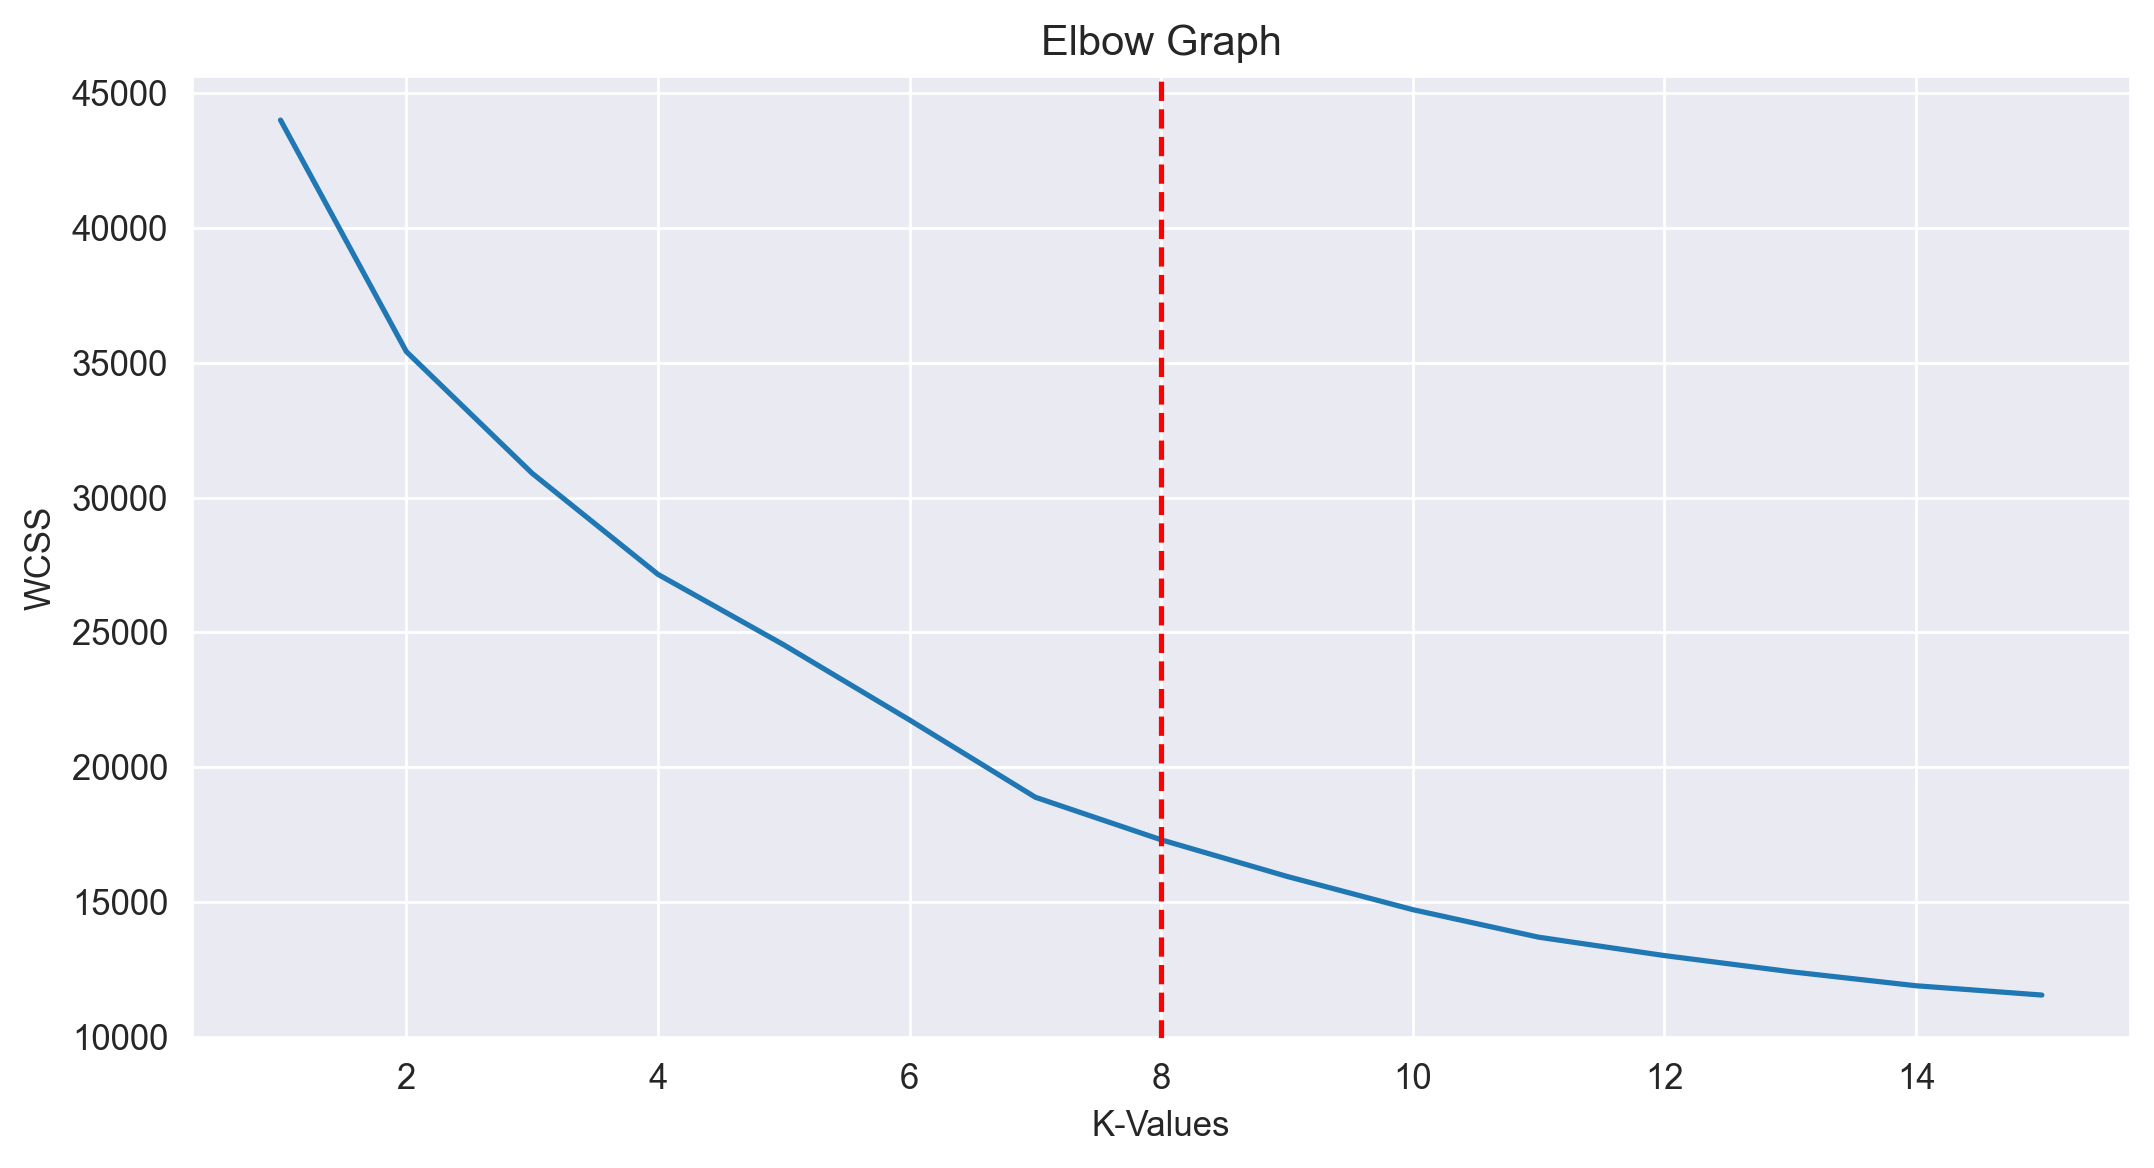

In [38]:
# Elbow Graph

plt.plot(range(1,16),EWwcss)
plt.xlabel('K-Values')
plt.axvline(x = 8, linestyle = '--', color = 'red')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [47]:
# From Elbow Curve we have to decide 8 Clusters.

In [48]:
km = KMeans(n_clusters=8)
EWyp = km.fit_predict(EWx)
EWyp

array([2, 2, 2, ..., 0, 1, 1])

In [49]:
EW['Cluster']=EWyp
EW

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [50]:
EW.iloc[:,1:11].groupby(EW.Cluster).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,
0,98.964198,1.695062,1.000000,1.000000,10584.520988,10.607407,421.613580,1.295062,4254.603704,1.000000
1,32.762565,1.252166,1.000000,1.000000,4420.370884,6.642981,150.268631,0.450607,2085.450607,0.000000
2,32.569388,1.496939,1.000000,1.001020,6235.202041,8.433673,174.996939,0.529592,5626.838776,0.000000
3,61.925610,4.201220,1.000000,1.002439,50224.776829,19.959756,388.939024,1.180488,4957.047561,0.630488
4,520.221311,2.385246,1.000000,1.000000,36582.278689,29.844262,6137.696721,17.696721,4762.639344,0.819672
5,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
7,5636.345455,2.072727,1.000000,1.000000,19804.290909,12.545455,963.036364,2.890909,3950.636364,0.527273


# Crime Data

In [51]:
crime=pd.read_csv("crime_data.csv", index_col=0)
crime

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [52]:
sc = StandardScaler()

Cx = sc.fit_transform(crime)
Cx

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [53]:
Ckm = KMeans()
Cyp = km.fit_predict(Cx)
Cyp

array([7, 5, 1, 3, 6, 6, 2, 2, 1, 7, 2, 0, 1, 3, 0, 3, 3, 7, 0, 1, 2, 1,
       0, 4, 1, 3, 3, 6, 0, 2, 1, 1, 4, 0, 2, 3, 2, 2, 2, 4, 0, 7, 1, 2,
       0, 3, 2, 0, 0, 3])

In [54]:
#cluster centre
km.cluster_centers_

array([[-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 0.80936747,  1.09651079,  0.7764984 ,  0.84615706],
       [-0.63817386, -0.38827513,  0.88223651, -0.27797516],
       [-0.15956455, -0.44557535, -0.39437496, -0.32460067],
       [ 1.55668205,  1.46553402, -1.38690338, -0.28745278],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [ 1.62625962,  0.60896914, -0.33428047,  0.30122146]])

In [55]:
# wcss values for crime data 
Cwcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(Cx)
    Cwcss.append(km.inertia_)

In [56]:
Cwcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 49.96920284452793,
 45.09214750567152,
 39.20151964984215,
 36.37626010523926,
 30.616017585613793,
 28.466850406625777]

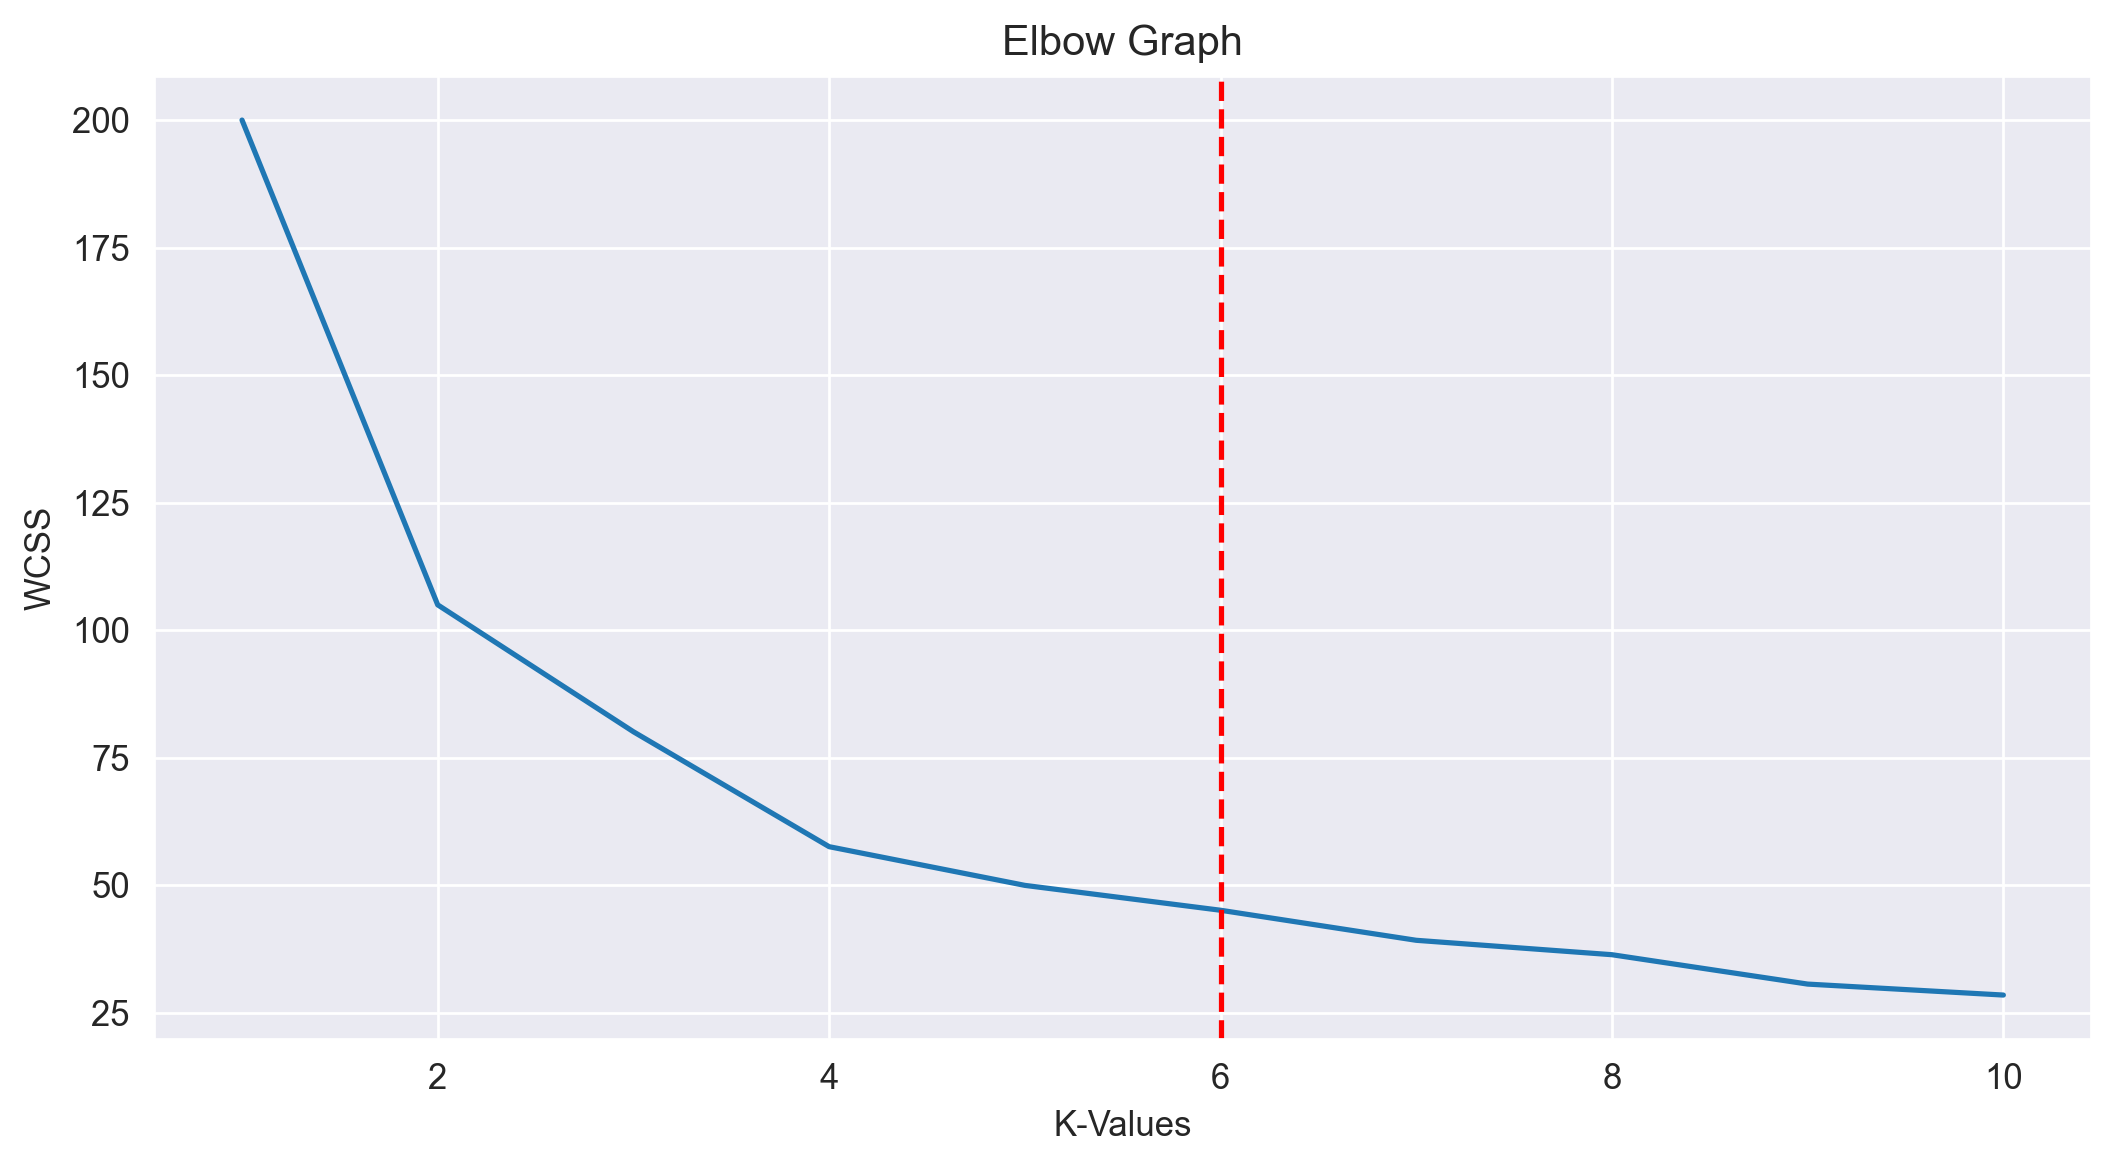

In [58]:
# Elbow Grapgh

plt.plot(range(1,11),Cwcss)
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.axvline(x = 6, linestyle = '--', color = 'red')


In [59]:
# From Elbow curve we have to decide 6 clusters

In [60]:
km = KMeans(n_clusters=6)
Cypred = km.fit_predict(Cx)
Cypred

array([4, 5, 1, 3, 5, 5, 0, 3, 1, 4, 0, 2, 1, 3, 2, 3, 3, 4, 2, 1, 0, 5,
       0, 4, 3, 3, 3, 5, 2, 0, 1, 1, 4, 2, 3, 3, 3, 0, 0, 4, 2, 4, 1, 0,
       2, 3, 3, 2, 2, 3])

In [61]:
crime['Cluster']=Cypred
crime

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,5
Colorado,7.9,204,78,38.7,5
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,3
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,4


In [62]:
crime.iloc[:,:4].groupby(crime.Cluster).mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,4.500000,117.000000,79.875000,15.925000
1,11.485714,274.000000,78.000000,28.342857
2,2.677778,69.888889,49.333333,10.466667
3,6.785714,146.142857,64.000000,20.350000
4,14.671429,251.285714,54.285714,21.685714
5,10.240000,250.000000,74.400000,40.980000


# DBSCAN

# East-West Airlines Data

In [63]:
EW=pd.read_excel("EASTWEST-Airlines.xlsx", index_col=0)
EW

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [64]:
EW.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [65]:
EW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [66]:
from sklearn.preprocessing import StandardScaler


In [67]:
sc = StandardScaler()

EWx = sc.fit_transform(EW)
EWx

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [68]:
from sklearn.cluster import DBSCAN


In [76]:
db = DBSCAN(eps=2, min_samples=12)

EWy = db.fit_predict(EWx)
EWy

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [77]:
EW['Cluster'] = EWy
EW

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
ID#,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [78]:
EW.groupby('Cluster').agg('mean')


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
-1,225687.589212,1491.705394,2.668050,1.174274,1.20332,47729.796680,25.423237,3311.946058,9.630705,4851.966805,0.742739
0,57585.495902,41.909016,1.695902,1.000000,1.00000,9775.423361,8.886475,187.600820,0.547951,3811.271311,0.000000
1,75887.015361,87.983871,2.641321,1.000000,1.00000,25391.933948,14.109063,445.843318,1.399386,4566.139785,1.000000
2,39218.500000,0.000000,1.000000,2.000000,1.00000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


# Crime Data

In [79]:
crime=pd.read_csv('crime_data.csv', index_col=0)
crime

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [80]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

In [81]:
sc = StandardScaler()

CRx = sc.fit_transform(crime)
CRx

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [82]:
db = DBSCAN(eps=1, min_samples=5)

CRy = db.fit_predict(CRx)
CRy

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0],
      dtype=int64)

In [83]:
#Analyze the clusters

In [84]:
crime['Cluster'] = CRy
crime

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1


In [85]:
crime.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
-1,11.152174,236.913043,66.739130,27.034783
0,4.904167,108.625000,61.708333,16.516667
1,5.066667,160.666667,87.000000,14.466667
